In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the CSV file 
df=pd.read_csv(r"advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.describe(include='all')
# also detect the outliers in this code with the help of standard deviation

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.dtypes


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

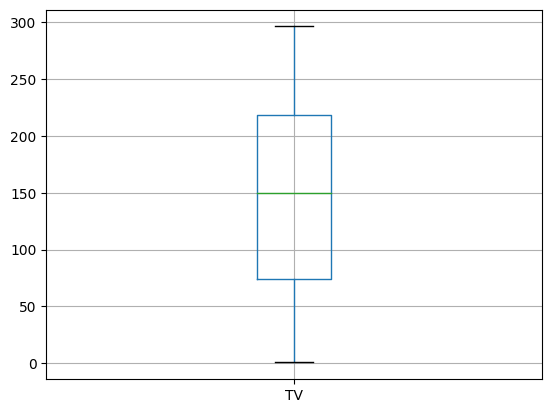

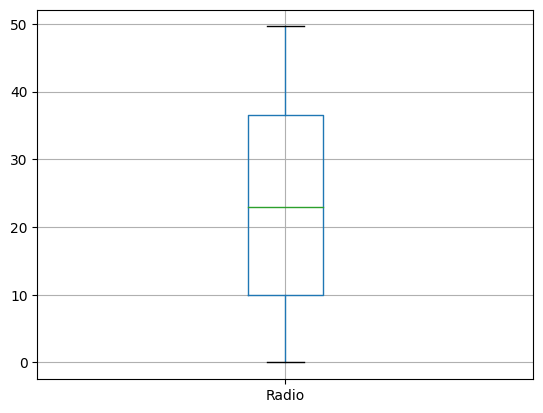

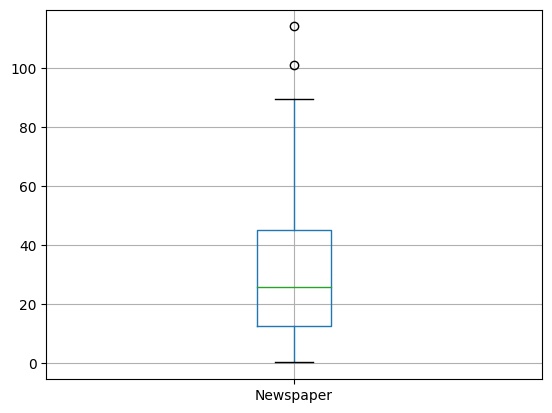

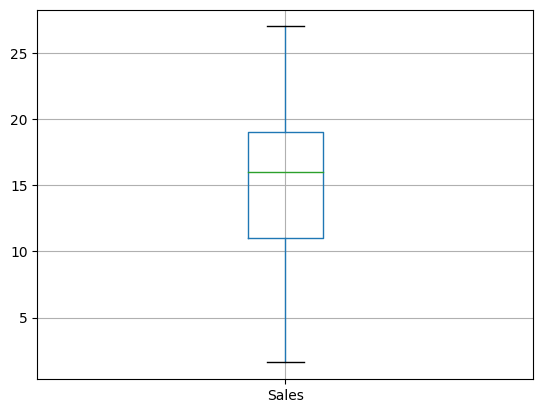

In [7]:
# 1- there should be no outliers in data 
for i in df.columns:
    df.boxplot(column=i)
    plt.show()                                

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

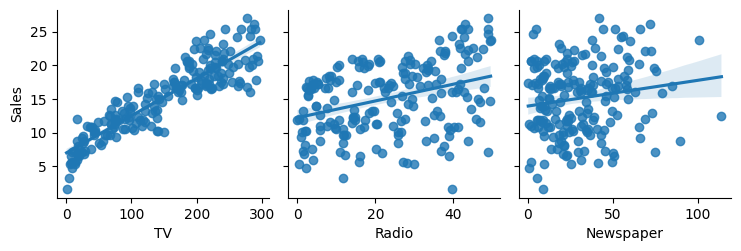

In [9]:
#2: every indepndnt variable should have a linear relation with dependent variable
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars="Sales",kind='reg')
plt.show()

In [10]:
#create X and Y

X=df[['TV', 'Radio', 'Newspaper']]
Y=df['Sales']

<ipython-input-11-c1747e74c8ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y,hist=True)


<Axes: xlabel='Sales', ylabel='Density'>

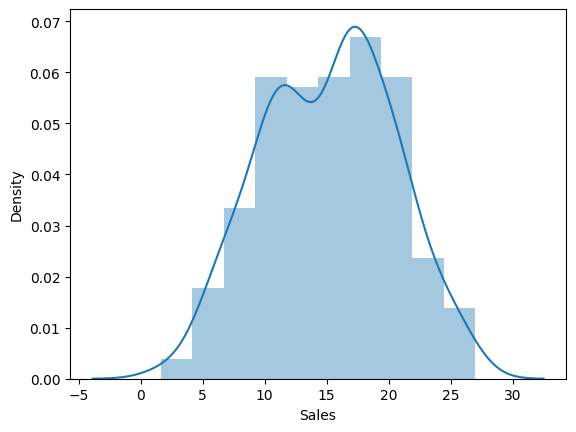

In [11]:
#3:  the dependent variable should follow an approximate norml distrbtn.
sns.distplot(Y,hist=True)

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>, <Axes: >]], dtype=object)

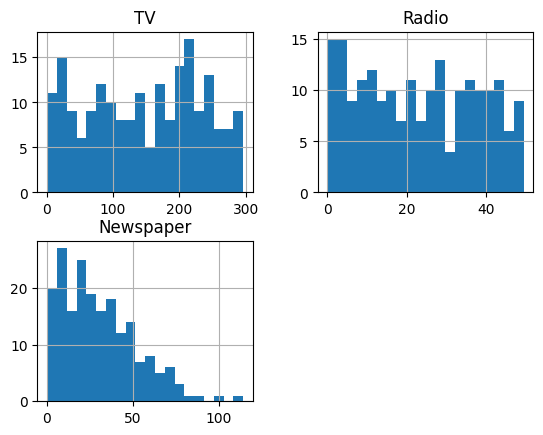

In [12]:
#to check if the data is heavyly skewed (right or left) in x variables.

X.hist(bins=20)

In [13]:
from scipy.stats import skew
#finding the skeness in each variables
data_num_skew=X.apply(lambda x: skew(x.dropna()))

#subsetting the variables that are highly skewed
data_num_skewed=data_num_skew[(data_num_skew>.75 ) | (data_num_skew<-.75)]

print(data_num_skew)
print(data_num_skewed)

import numpy as np 
#apply log +1 transformtn for all numeric features with skewness over.75
X[data_num_skewed.index]= np.log1p(X[data_num_skewed.index])

TV          -0.069328
Radio        0.093467
Newspaper    0.887996
dtype: float64
Newspaper    0.887996
dtype: float64


<ipython-input-13-d489cd9d82bb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[data_num_skewed.index]= np.log1p(X[data_num_skewed.index])


In [14]:
data_num_skewed.index

Index(['Newspaper'], dtype='object')

In [15]:
X

,TV,Radio,Newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294
...,...,...,...
195,38.2,3.7,2.694627
196,94.2,4.9,2.208274
197,177.0,9.3,2.001480
198,283.6,42.0,4.207673


                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.030951
Radio      0.054809  1.000000   0.251909
Newspaper  0.030951  0.251909   1.000000


<Axes: >

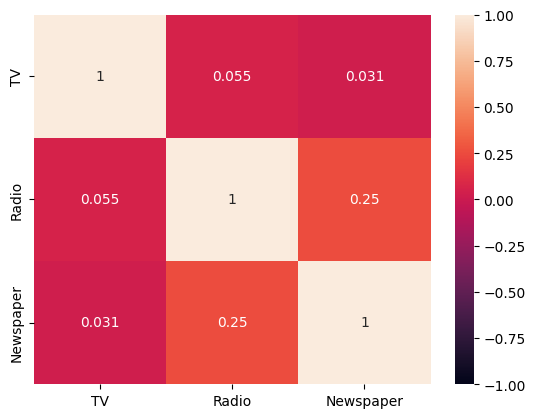

In [16]:
#4 : there should be no multicolinearity between the independent variables
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)    
                                                            

In [17]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor as vif

vif_df= pd.DataFrame()
vif_df['features']=X.columns
vif_df['VIP Factor']= [vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIP Factor
0,TV,3.39
1,Radio,3.63
2,Newspaper,5.44


In [18]:
from sklearn.model_selection import train_test_split
#split the data into train and test 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)   
                                                                                    
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [19]:
from sklearn.linear_model import LinearRegression
#create a model obj
lm=LinearRegression()
#train the model obj
lm.fit(X_train,Y_train)
#print interceot and coefficient
print(lm.intercept_)         #----- y intercept(b0)  
print(lm.coef_)             # coefcnt of tv , radio,newspaper

4.8465871993990515
[ 0.05350462  0.10864058 -0.02739034]


In [20]:
# pair the feature name with the coefficient
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.053504620408701756), ('Radio', 0.10864058303632274), ('Newspaper', -0.027390342656605372)]


In [21]:
#manually predicting 
x1=100
x2=100
x3=100
y_pred=4.846587199399048+(0.05350462040870177*x1)+(0.10864058303632286*x2)+(-0.02739034265660538*x3)
print(y_pred)                          

18.32207327824097


In [22]:
#manually predicting 
x1=100
x2=200
x3=0
y_pred=4.846587199399048+(0.05350462040870177*x1)+(0.10864058303632286*x2)+(-0.02739034265660538*x3)
print(y_pred)             

31.925165847533798


In [23]:
#manually predicting 
x1=50
x2=250
x3=0
y_pred=4.846587199399048+(0.05350462040870177*x1)+(0.10864058303632286*x2)+(-0.02739034265660538*x3)
print(y_pred)

34.68196397891485


In [24]:
#predict using model
Y_pred_new=lm.predict(X_test)             
Y_pred_new


array([19.2610297 , 10.50598164, 19.43187866, 24.46815242, 20.85385189,
       15.24213698, 16.80338695, 20.74290276, 21.12424533, 10.63698455,
       24.83404133,  8.92497363, 10.37503597, 20.15094747, 20.51665799,
       13.49589917, 21.38282963,  8.31972272, 21.81972082, 20.63186092,
       17.12266624,  9.12397322, 23.35618877, 15.06635766, 20.85069348,
        8.10206668, 10.38941   , 11.39219044, 22.10956916,  7.99978521,
       13.79428466, 21.04562009,  6.40750056,  6.44319199, 20.78414309,
       19.81335357,  9.07404676, 21.15471974, 10.62281213, 17.04291313])

In [25]:
lm.score(X_train,Y_train)              

0.907072634818375

In [26]:
new_df=pd.DataFrame()                #compairing actual or predicted sales
new_df=X_test

new_df['Actual sales']=Y_test
new_df['Predicted sales']=Y_pred_new
new_df

,TV,Radio,Newspaper,Actual sales,Predicted sales
59,210.7,29.5,2.332144,18.4,19.261030
5,8.7,48.9,4.330733,7.2,10.505982
20,218.4,27.7,3.996364,18.0,19.431879
198,283.6,42.0,4.207673,25.5,24.468152
52,216.4,41.7,3.703768,22.6,20.853852
19,147.3,23.9,3.000720,14.6,15.242137
162,188.4,18.1,3.280911,19.9,16.803387
55,198.9,49.4,4.110874,23.7,20.742903
69,216.8,43.9,3.339322,22.3,21.124245
2,17.2,45.9,4.252772,12.0,10.636985


In [27]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)                  
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))      
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)      
print(adjusted_r_squared)

0.8885172352204621
2.1106041587295454
0.8868108663717957


In [28]:
print(min(Y_test))               
print(max(Y_test))               

1.6
25.5


# RIDGE AND LASSO

In [29]:
from sklearn.model_selection import train_test_split
#split the data into train and test 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [30]:
from sklearn.linear_model import Ridge
#create a model obj
lm=Ridge()
#train the model obj
lm.fit(X_train,Y_train)
#print interceot and coefficient
print(lm.intercept_)
print(lm.coef_)

# **********************
# previous values:
#     4.846587199399048
# [ 0.05350462  0.10864058 -0.02739034]
# *****************

4.8460066052192765
[ 0.0535045   0.10863439 -0.02715513]


In [31]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8885203675797508
2.1105745074332476
0.8868140466753592


In [32]:
print(list(zip(X.columns,lm.coef_)))


[('TV', 0.05350450182128494), ('Radio', 0.10863438696491586), ('Newspaper', -0.027155132210539265)]


In [33]:
X_train.shape


(160, 3)

In [34]:
X1=100
X2=1000
X3=np.log1p(0)
Y_pred1=3.353+(0.437*X1)+(.19303*X2)+(-.4895*X3)
Y_pred1

240.083

In [35]:
#predict using the mode;
Y_pred=lm.predict(X_test)
Y_pred

array([19.26078988, 10.50611566, 19.43204052, 24.46826765, 20.85385842,
       15.24209663, 16.80344357, 20.74295941, 21.12415246, 10.63711782,
       24.83409456,  8.92510824, 10.37524205, 20.15099612, 20.51686619,
       13.49565003, 21.38249234,  8.31950704, 21.81962557, 20.63168815,
       17.12248571,  9.1236816 , 23.35625816, 15.06649132, 20.85074836,
        8.10227604, 10.38913327, 11.39226211, 22.10940165,  7.99975759,
       13.7944147 , 21.04560128,  6.4076306 ,  6.44342815, 20.78403214,
       19.81348018,  9.07400291, 21.15451052, 10.62300697, 17.0429075 ])

In [36]:
lm.score(X_train,Y_train) #r square data should be 
#Y_pred=lm.predict(X_train)----> predict on basis of xtrain
#score=r2_score(Y_train,Y_pred)----->compair x train and y pred to give score value

0.9070726330190939

In [37]:
new_df=pd.DataFrame()
new_df=X_test

new_df['Actual sales']=Y_test
new_df['Predicted sales']=Y_pred
new_df

,TV,Radio,Newspaper,Actual sales,Predicted sales
59,210.7,29.5,2.332144,18.4,19.260790
5,8.7,48.9,4.330733,7.2,10.506116
20,218.4,27.7,3.996364,18.0,19.432041
198,283.6,42.0,4.207673,25.5,24.468268
52,216.4,41.7,3.703768,22.6,20.853858
19,147.3,23.9,3.000720,14.6,15.242097
162,188.4,18.1,3.280911,19.9,16.803444
55,198.9,49.4,4.110874,23.7,20.742959
69,216.8,43.9,3.339322,22.3,21.124152
2,17.2,45.9,4.252772,12.0,10.637118


In [38]:
print((Y_test).min())
print((Y_test).max())

1.6
25.5


In [39]:
from sklearn.model_selection import train_test_split
#split the data into train and test 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [40]:
from sklearn.linear_model import Lasso         #lasso is best for feature selectn 
#create a model obj
lm=Lasso()
#train the model obj
lm.fit(X_train,Y_train)
#print interceot and coefficient
print(lm.intercept_)
print(lm.coef_)

4.890111203757092
[ 0.05339547  0.10353356 -0.        ]


In [41]:
Y_pred=lm.predict(X_test)
lm.score(X_train,Y_train)
new_df=pd.DataFrame()
new_df=X_test

new_df['Actual sales']=Y_test
new_df['Predicted sales']=Y_pred
new_df

,TV,Radio,Newspaper,Actual sales,Predicted sales
59,210.7,29.5,2.332144,18.4,19.194776
5,8.7,48.9,4.330733,7.2,10.417443
20,218.4,27.7,3.996364,18.0,19.419561
198,283.6,42.0,4.207673,25.5,24.381475
52,216.4,41.7,3.703768,22.6,20.762240
19,147.3,23.9,3.000720,14.6,15.229716
162,188.4,18.1,3.280911,19.9,16.823775
55,198.9,49.4,4.110874,23.7,20.625028
69,216.8,43.9,3.339322,22.3,21.011372
2,17.2,45.9,4.252772,12.0,10.560704


In [42]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8887804037153686
RMSE: 2.1081115191417372
Adj R-square: 0.88707806295591


In [43]:
new_df=pd.DataFrame()
new_df=X_train
new_df["sales"]=Y_train
new_df

,TV,Radio,Newspaper,sales
190,39.5,41.1,1.916923,10.8
7,120.2,19.6,2.533697,13.2
26,142.9,29.3,2.610070,15.0
138,43.0,25.9,3.068053,9.6
58,210.8,49.6,3.655840,23.8
...,...,...,...,...
113,209.6,20.6,2.459589,20.9
64,131.1,42.8,3.397858,16.0
15,195.4,47.7,3.987130,22.4
125,87.2,11.8,3.292126,10.6
